<a href="https://colab.research.google.com/github/yunseo4401/start/blob/master/SVM_%EB%B6%84%EB%A5%98%2C_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('classfication.txt', sep = ',')
df

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


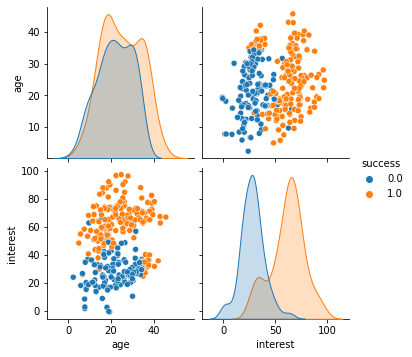

In [5]:
sns.pairplot(hue='success',data=df)
#인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝 지을 수 있는 모든 조합에 대해서 표현
#각 그리드의 두 변수 간의 관계를 나타내는 그래프를 하나씩 그리며
#같은 변수끼리 짝을 이루는 대각선 방향으로는 히스토그램을 그린다.
#서로 다른 변수 간에는 산점도를 그린다.

In [6]:
from sklearn.model_selection import train_test_split 
x=df[['age','interest']]
y=df['success']

train_input,test_input,train_target,test_target=train_test_split(x,y,stratify=y,train_size=0.7,random_state=1)
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(207, 2) (207,)
(90, 2) (90,)


In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_scaled=ss.fit_transform(train_input)
test_scaled=ss.transform(test_input)

In [10]:
from sklearn.svm import SVC
clf=SVC(C=0.5)
clf.fit(train_scaled,train_target)

SVC(C=0.5)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

pred=clf.predict(test_scaled)
test_cm=confusion_matrix(test_target,pred)
test_acc=accuracy_score(test_target,pred)
test_prc=precision_score(test_target,pred)
test_rcll=recall_score(test_target,pred)
test_f1=f1_score(test_target,pred)

print(test_cm)
print(test_acc)
print(test_prc)
print(test_rcll)
print(test_f1)

[[37  2]
 [ 2 49]]
0.9555555555555556
0.9607843137254902
0.9607843137254902
0.9607843137254902


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


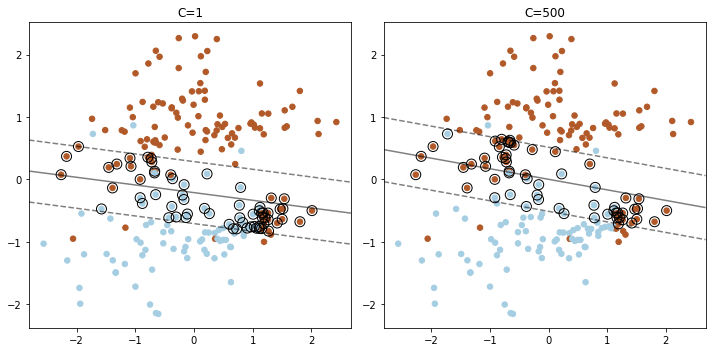

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_scaled, train_target)
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(train_scaled)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_scaled[support_vector_indices]

    plt.subplot(1, 2, i +1)
    plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c =train_target, s =30, cmap =plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()

SVM 회귀 

In [15]:
import numpy as np
x=np.sort(5*np.random.rand(40,1),axis=0)
y=np.sort(x).ravel() 

print(x[0:6],'/n/n',y[0:10])

[[0.1970464 ]
 [0.58988711]
 [0.59014747]
 [0.68644981]
 [0.70054109]
 [0.72079547]] /n/n [0.1970464  0.58988711 0.59014747 0.68644981 0.70054109 0.72079547
 0.84223556 1.0724464  1.15425217 1.26240955]


In [16]:
#타깃데이터에 노이즈 추가하기 
y[::5]+=3*(0.5 - np.random.rand(8))
print(y[0:10])

[0.87791328 0.58988711 0.59014747 0.68644981 0.70054109 1.49690446
 0.84223556 1.0724464  1.15425217 1.26240955]


In [18]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1)
svr_lin=SVR(kernel='linear',C=100,gamma='auto')
svr_poly=SVR(kernel='poly',C=100,gamma='auto',degree=3,epsilon=0.1,coef0=1)

svr_rbf.fit(x,y)
svr_lin.fit(x,y)
svr_poly.fit(x,y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [19]:
rbf_pred=svr_rbf.predict(x)
lin_pred=svr_lin.predict(x)
poly_pred=svr_poly.predict(x)

from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error
preds=[rbf_pred,lin_pred,poly_pred]
kernel=['Random_Forest','Linear','Polynomial']
evls=['mse','rmse','mae']

results=pd.DataFrame(index=kernel,columns=evls)


In [20]:
for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

,mse,rmse,mae
Random_Forest,0.11,0.33,0.18
Linear,0.12,0.35,0.17
Polynomial,0.1,0.32,0.17


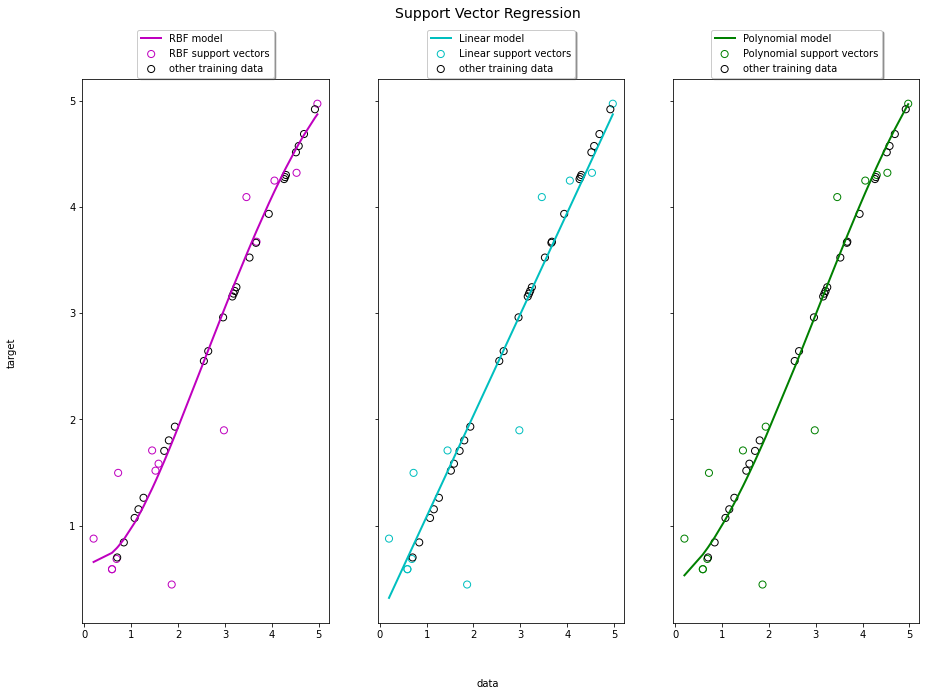

In [22]:
import matplotlib.pyplot as plt
lw =2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        x,
        svr.fit(x, y).predict(x),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[np.setdiff1d(np.arange(len(x)), svr.support_)],
        y[np.setdiff1d(np.arange(len(x)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()